# Analyzing Time Series Data with Socrata and Python

## Loading datasets into our notebook

We'll start by loading a city of Seattle permits dataset into a Pandas DataFrame. We'll use the open source sodapy Python Socrata module to do this.

In [1]:
import pandas as pd
from sodapy import Socrata

def download_dataset(domain, dataset_id):
    # for this exercise, we're not using an app token,
    # but you *should* sign-up and register for an app_token if you want to use the Socrata API
    client = Socrata(domain, app_token=None)
    offset = None
    data = []
    batch_size = 1000

    while True:
        records = client.get(dataset_id, offset=offset, limit=batch_size)
        data.extend(records)
        if len(records) < batch_size:
            break
        offset = offset + batch_size if (offset) else batch_size

    return pd.DataFrame.from_dict(data)

def download_permits_dataset():
    return seattle_permits_df if "seattle_permits_df" in globals() else download_dataset("data.seattle.gov", "k44w-2dcq")

# load Seattle permits data
seattle_permits_df = download_permits_dataset()

In the next few cells we'll do some exploration of our datasets using the `len`, `head`, and `value_counts` functions. We'll start by getting a sense of how many rows are in each of our datasets with the `len` function.

In [2]:
print(len(seattle_permits_df))
seattle_permits_df.head(10)

131495


,permitnum,permitclass,permitclassmapped,permittype,permittypedesc,description,statuscurrent,originaladdress1,originalcity,originalstate,...,housingunitsremoved,housingunitsadded,applieddate,issueddate,expiresdate,:@computed_region_2day_rhn5,:@computed_region_cyqu_gs94,completeddate,housingunits,contractorcompanyname
0,6626842-CN,Commercial,Non-Residential,Building,Addition/Alteration,Pallet Racking &amp; Gondola Anchoring,Additional Info Requested,951 NW BALLARD WAY,SEATTLE,WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6509279-CN,N/A,N/A,Building,NaN,Construct sfr,Closed,5400 SW BEACH DRIVE TER,SEATTLE,WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6162461-CN,Single Family/Duplex,Residential,Building,New,Establish use for and construct one new single...,Closed,3810 S ANGEL PL,SEATTLE,WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6242541-CN,Single Family/Duplex,Residential,Building,Addition/Alteration,Re-construction of SFR in rear of property.,Closed,1511 NW 62ND ST,SEATTLE,WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6063735-CN,Single Family/Duplex,Residential,Building,New,Closed as Incomplete - Expired Permit Estab...,Completed,8809 DELRIDGE WAY SW,SEATTLE,WA,...,0,2,2005-12-07,2006-05-16,2007-11-16,NaN,NaN,NaN,NaN,NaN
5,6504887-CN,Single Family/Duplex,Residential,Building,Addition/Alteration,Covered deck addition &amp; new retaining wall,Closed,4810 48TH AVE S,SEATTLE,WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6537761-CN,Single Family/Duplex,Residential,Building,Addition/Alteration,Enlarge existing in ground pool on street side...,Closed,6406 60TH PL S,SEATTLE,WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6735011-CN,Commercial,Non-Residential,Building,Addition/Alteration,Construct tenant improvements and convenience ...,Reviews In Process,701 5th AVE,NaN,NaN,...,NaN,NaN,2019-07-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6749817-CN,Single Family/Duplex,Residential,Building,Addition/Alteration,We are adding an ADU in the basement. The stru...,Scheduled and Submitted,7747 16TH AVE NE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6747833-CN,Commercial,Non-Residential,Building,Addition/Alteration,Construct alterations to an existing commercia...,Reviews In Process,14401 GREENWOOD AVE N,SEATTLE,WA,...,NaN,NaN,2019-09-25,NaN,NaN,116,1,NaN,NaN,NaN


Now let's see have a peek at the first 5 rows in each of those dataset using the `head` method. You can optionally pass a parameter for the number of rows you want to print if 5 isn't enough.

In [3]:
seattle_permits_df.head(10)

,permitnum,permitclass,permitclassmapped,permittype,permittypedesc,description,statuscurrent,originaladdress1,originalcity,originalstate,...,housingunitsremoved,housingunitsadded,applieddate,issueddate,expiresdate,:@computed_region_2day_rhn5,:@computed_region_cyqu_gs94,completeddate,housingunits,contractorcompanyname
0,6626842-CN,Commercial,Non-Residential,Building,Addition/Alteration,Pallet Racking &amp; Gondola Anchoring,Additional Info Requested,951 NW BALLARD WAY,SEATTLE,WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6509279-CN,N/A,N/A,Building,NaN,Construct sfr,Closed,5400 SW BEACH DRIVE TER,SEATTLE,WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6162461-CN,Single Family/Duplex,Residential,Building,New,Establish use for and construct one new single...,Closed,3810 S ANGEL PL,SEATTLE,WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6242541-CN,Single Family/Duplex,Residential,Building,Addition/Alteration,Re-construction of SFR in rear of property.,Closed,1511 NW 62ND ST,SEATTLE,WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6063735-CN,Single Family/Duplex,Residential,Building,New,Closed as Incomplete - Expired Permit Estab...,Completed,8809 DELRIDGE WAY SW,SEATTLE,WA,...,0,2,2005-12-07,2006-05-16,2007-11-16,NaN,NaN,NaN,NaN,NaN
5,6504887-CN,Single Family/Duplex,Residential,Building,Addition/Alteration,Covered deck addition &amp; new retaining wall,Closed,4810 48TH AVE S,SEATTLE,WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6537761-CN,Single Family/Duplex,Residential,Building,Addition/Alteration,Enlarge existing in ground pool on street side...,Closed,6406 60TH PL S,SEATTLE,WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6735011-CN,Commercial,Non-Residential,Building,Addition/Alteration,Construct tenant improvements and convenience ...,Reviews In Process,701 5th AVE,NaN,NaN,...,NaN,NaN,2019-07-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6749817-CN,Single Family/Duplex,Residential,Building,Addition/Alteration,We are adding an ADU in the basement. The stru...,Scheduled and Submitted,7747 16TH AVE NE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6747833-CN,Commercial,Non-Residential,Building,Addition/Alteration,Construct alterations to an existing commercia...,Reviews In Process,14401 GREENWOOD AVE N,SEATTLE,WA,...,NaN,NaN,2019-09-25,NaN,NaN,116,1,NaN,NaN,NaN


Printing our dataframes like this gives us a sense of what columns exist, and quick sense of some of the values in the dataset. But there's an even better way to detrmine the top values for a particular column -- the `value_counts` method.

In [4]:
seattle_permits_df["applieddate"].value_counts(dropna=False).head(10)

NaN           15292
2005-11-17      118
2016-06-17      111
2016-06-23       95
2013-12-23       85
2015-11-24       83
2006-08-02       80
2015-04-16       78
2013-11-15       77
2018-01-17       76
Name: applieddate, dtype: int64

## Removing missing values

The value counts make it clear that a lot of the values in the "applieddate" column are missing or null. There a variety of ways you can handle missing data, but removing incomplete rows is the simplest, so it's what we'll do here today. In the next cell, we'll remove rows with null dates. There are also a lot of columns in the permits dataset that we won't use in this analysis. So we'll also filter down our dataset to just the columns we're interested in to reduce the amount of extraneous information.

In [5]:
seattle_permits_df = seattle_permits_df[seattle_permits_df["applieddate"].notnull()]
seattle_permits_df = seattle_permits_df[["applieddate"]].reset_index(drop=True)
seattle_permits_df.head(10)

,applieddate
0,2005-12-07
1,2019-07-17
2,2019-09-25
3,2017-04-04
4,2018-03-20
5,2019-09-06
6,2016-01-12
7,2018-12-26
8,2019-09-20
9,2018-12-12


## Aggregating based on date

Currently, each row in our dataset corresponds to a permit application and the only column we've preserved is the date of the application. The task of forecasting number of permit applications is not really interesting (or reliable) at the granularity of day. Predicting at the granularity of week might be interesting, but let's start by grouping by month. To get some datatime functionality from Python, we'll convert our date column to a datetime type.

In [6]:
import datetime

fixed_dates_df = seattle_permits_df.copy()
fixed_dates_df["applieddate"] = fixed_dates_df["applieddate"].apply(pd.to_datetime)
fixed_dates_df = fixed_dates_df.set_index(fixed_dates_df["applieddate"])
grouped = fixed_dates_df.resample("M").count()
data_df = pd.DataFrame({"count": grouped.values.flatten()}, index=grouped.index)
data_df.head(10)

,count
applieddate,
1986-04-30,1
1986-05-31,0
1986-06-30,0
1986-07-31,0
1986-08-31,0
1986-09-30,0
1986-10-31,0
1986-11-30,0
1986-12-31,0


## Plotting a time series

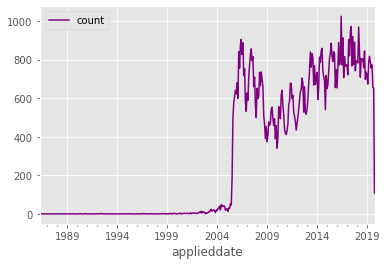

In [8]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use("ggplot")

data_df.plot(color="purple")

Notice how the number of applications in 2005 and before looks suspiciously low. My intuition is that this is a data problem. Let's remove all data from before 2006, since bad data will impact the accuracy of our model. Let's also remove data from before October of this year, since October is incomplete.

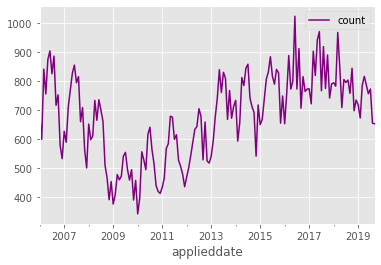

In [9]:
def is_between_2006_and_now(date):
    return date > datetime.datetime(2006, 1, 1) and date < datetime.datetime(2019, 10, 1)

data_df = data_df[data_df.index.to_series().apply(is_between_2006_and_now)]
data_df.plot(color="purple")

This plot makes two things pretty clear. Firstly, there are some clear trends in the time series -- for example, an increase between 2009 and 2016, followed by a levelling off and subsequent decrease of permit applications. Secondly, there is a cyclic nature to the time series, which is indicative of there being seasonal variation in permit applications (which isn't surprising).

## Understanding long-term trends and seasonality

The types of modeling used on time series assume "stationarity". For a time series to be stationary, mean and variance should be constant over time (and of course, most real life time series will not be stationary). To satisfy this assumption, we need to remove trend and seasonality from our series. The underlying modeling code we will use will do this for us. Doing this ourselves explicitly enables us to make educated guesses about reasonable parameters for our model. We'll use the `seasonal_decompose` function to do this.

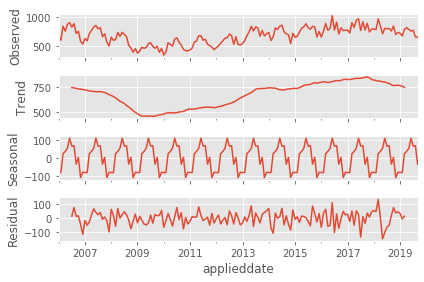

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_df)
fig = result.plot()

## Forecasting with Prophet

Next, we'll create a Prophet model. Doing so requires only that we rename our count column, and that we have a new column "ds" which is our timestamps. After training our model, we'll use it to predict a year into the future.

In [11]:
from fbprophet import Prophet
model = Prophet()
train_df = data_df.rename(columns={"count":'y'})
train_df["ds"] = train_df.index
model.fit(train_df)

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.
/Users/robertvoyer/miniconda3/envs/socrata-time-series-blog/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


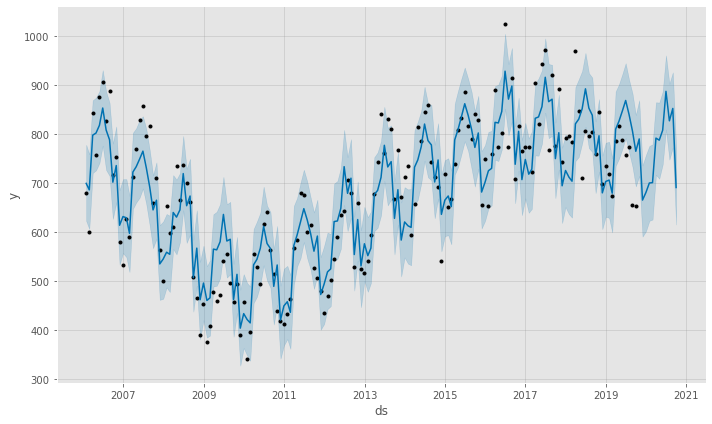

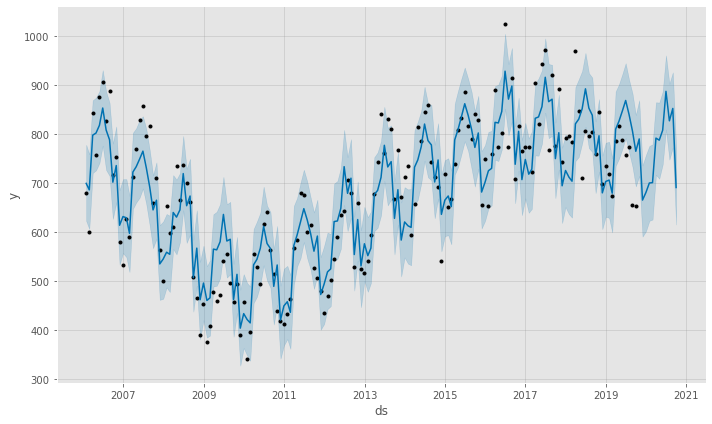

In [12]:
pd.plotting.register_matplotlib_converters()
future = model.make_future_dataframe(12, freq='M', include_history=True)
forecast = model.predict(future)
model.plot(forecast)